# Read in the data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/CodingKroger/422-Practical-Machine-Learning/master/mspa-survey-data.csv"
data = pd.read_csv(url)

In [110]:
# Check to see that the data loaded in properly
data.head(2)

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50,50.0,90.0,51.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0,20.0,50.0,90.0,50.0,6.0,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),NaN,PREDICT 420 Database Systems and Data Preparat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018


# Jump Start (EDA)

In [0]:
# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [6]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv(url)

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']



Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  ...  Gra

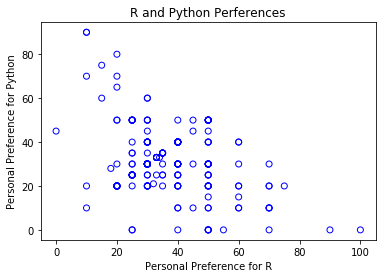

In [7]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    



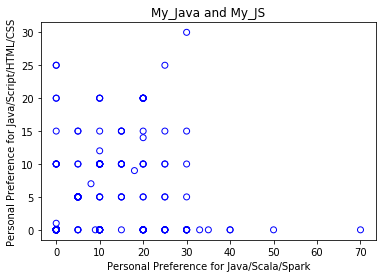

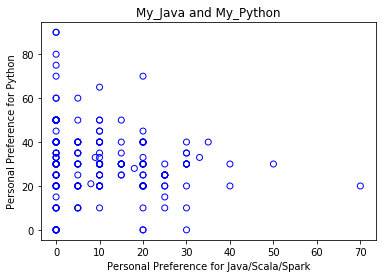

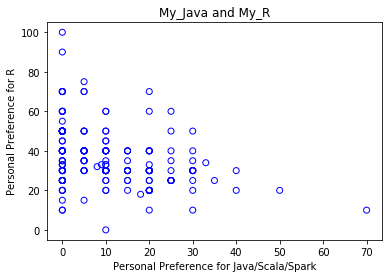

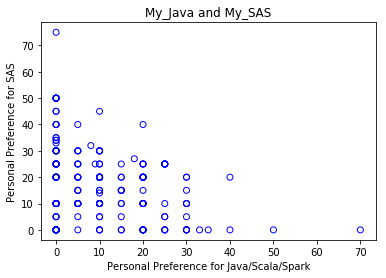

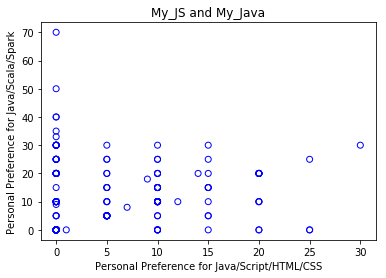

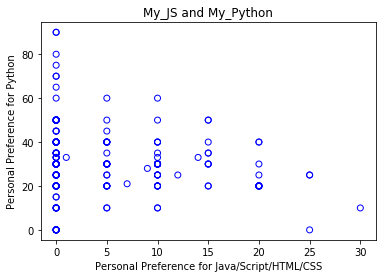

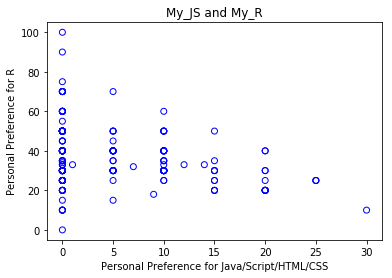

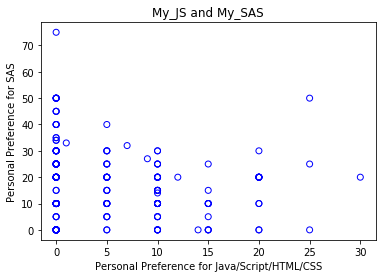

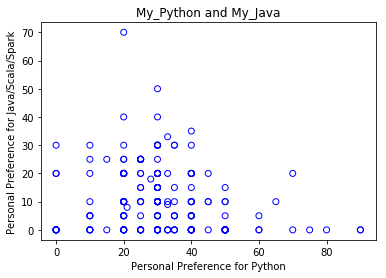

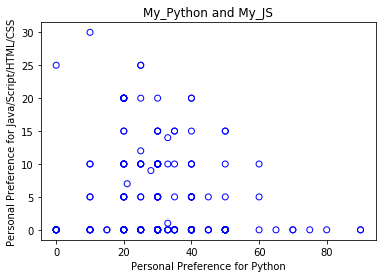

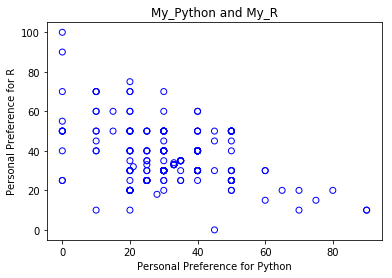

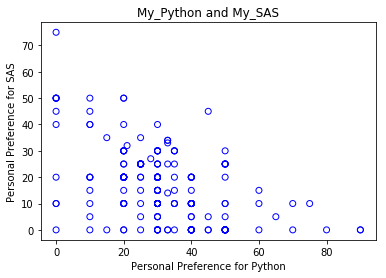

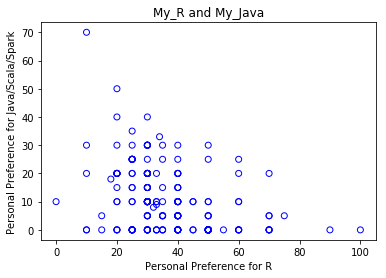

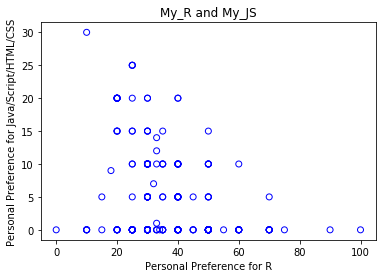

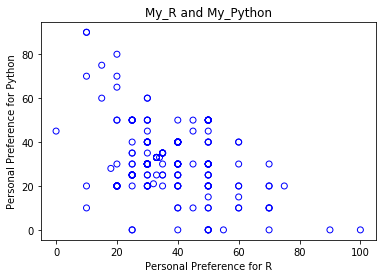

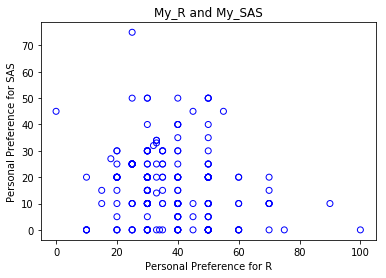

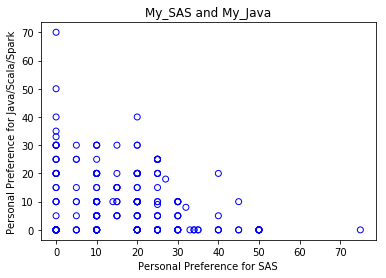

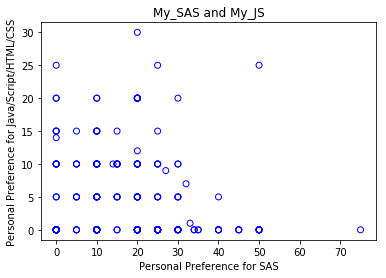

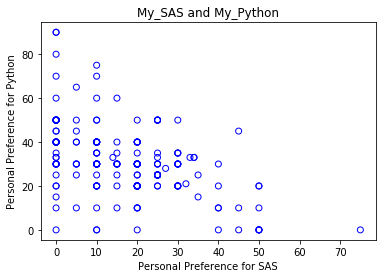

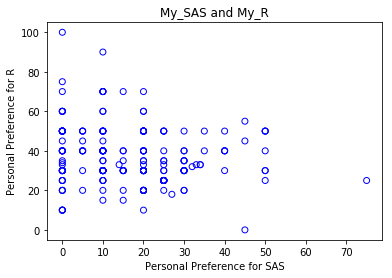

In [8]:

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  


<Figure size 432x288 with 0 Axes>

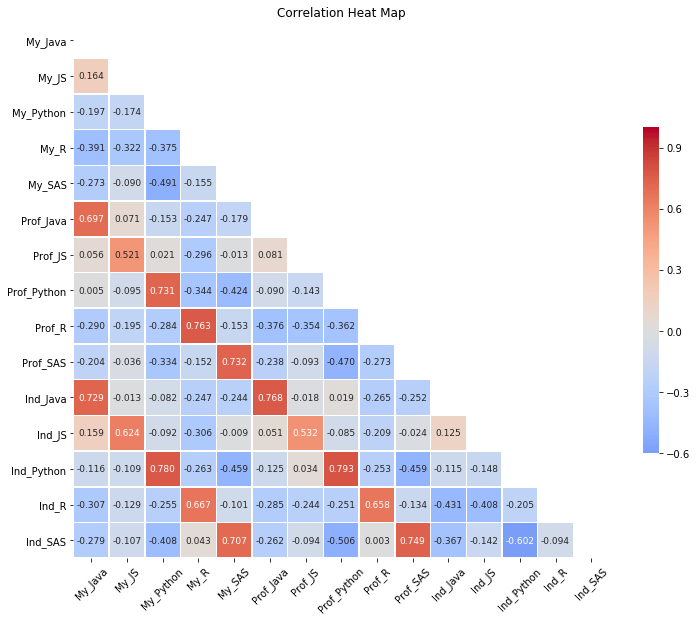

In [9]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [0]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python  ...  Ind_Python       Ind_R     Ind_SAS
count  207.000000  207.000000  207.000000  ...  207.000000  207.000000  207.000000
mean    10.135266    4.797101   31.304348  ...   29.772947   32.434783   18.884058
std     11.383477    6.757764   15.570982  ...   17.959816   15.912209   19.137623
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    0.000000   20.000000  ...   20.000000   22.500000    0.000000
50%      9.000000    0.000000   30.000000  ...   30.000000   30.000000   15.000000
75%     20.000000   10.000000   40.000000  ...   40.000000   40.000000   30.000000
max     70.000000   30.000000   90.000000  ...   95.000000   85.000000  100.000000

[8 rows x 15 columns]


In [0]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


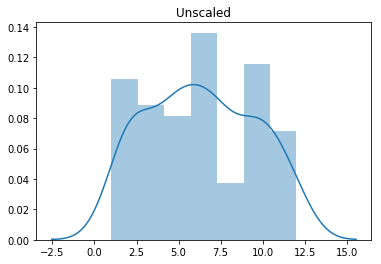

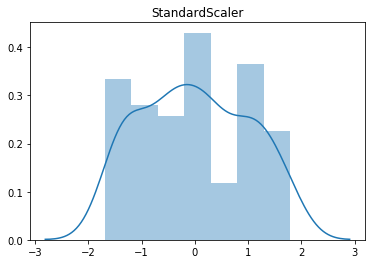

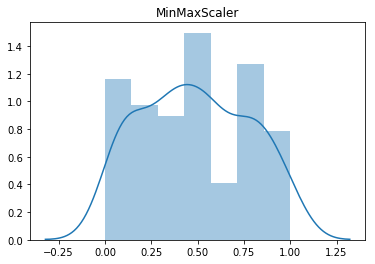

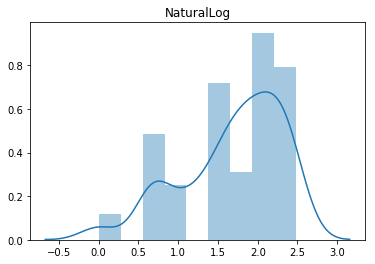

In [0]:

# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()
X = pd.DataFrame(X)

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [0]:
data = data.fillna(0)
#Answering Management Question number 1: Learn about current student software preferences
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS"]].describe()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681
std,11.383477,6.757764,15.570982,14.576003,13.626400
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000


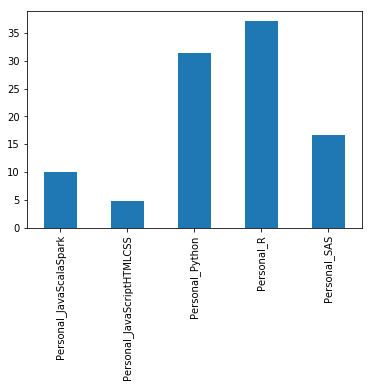

In [104]:
# Visualize personal scores 
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS"]].mean().plot.bar()

In [0]:
#Answering Management Question number 2: Learn about student interest in potential new courses
data[["Python_Course_Interest","Foundations_DE_Course_Interest","Analytics_App_Course_Interest","Systems_Analysis_Course_Interest"]].describe()


,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,207.000000,207.000000,207.000000,207.000000
mean,73.173913,56.082126,54.135266,51.816425
std,30.198513,33.712203,34.662185,34.367165
min,0.000000,0.000000,0.000000,0.000000
25%,52.000000,25.000000,23.500000,20.000000
50%,82.000000,60.000000,53.000000,50.000000
75%,100.000000,85.000000,85.000000,80.000000
max,100.000000,100.000000,100.000000,100.000000


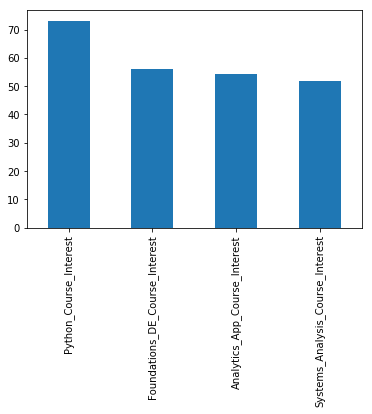

In [0]:
# Visualize new course interest as a mean
data[["Python_Course_Interest","Foundations_DE_Course_Interest","Analytics_App_Course_Interest","Systems_Analysis_Course_Interest"]].mean().plot.bar()

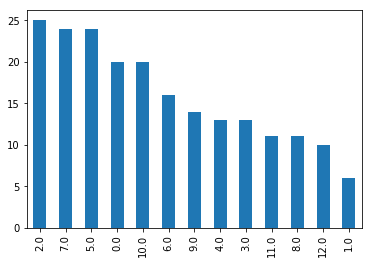

In [0]:
# Get value counts of courses completed by students
data['Courses_Completed'].value_counts().sort_values(ascending=False).plot.bar()

In [31]:
# Divide the students into groupings based on number of courses completed
l1 = []
data2 = data.dropna(subset=['Courses_Completed'])
for i in data2["Courses_Completed"]:
  if i <= 4:
    l1.append('Freshman')
  if i > 8:
    l1.append('Senior')
  if i <= 8 and i > 4:
    l1.append('Junior')
data2['Student Class'] = l1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [41]:
# Observe interest of new courses based on the senority of groups
data2[['Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest',"Student Class"]].groupby(["Student Class"]).mean().sort_values(by='Python_Course_Interest', ascending=False)

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
Student Class,,,,
Freshman,76.245614,65.446429,60.368421,57.690909
Junior,72.432432,49.185714,54.666667,51.585714
Senior,71.672727,57.648148,48.981481,48.563636


In [44]:
# Observe interest of personal software based on the senority of groups
data2[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS","Student Class"]].groupby(["Student Class"]).mean().sort_values(by="Personal_JavaScalaSpark", ascending=True)

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS
Student Class,,,,,
Freshman,9.000000,7.245614,32.736842,35.631579,15.385965
Junior,9.840000,4.213333,30.866667,38.413333,16.666667
Senior,11.727273,3.945455,29.727273,37.509091,17.090909


In [45]:
# And now professional software based on the senority of groups
data2[["Professional_JavaScalaSpark","Professional_JavaScriptHTMLCSS","Professional_Python","Professional_R","Professional_SAS","Student Class"]].groupby(["Student Class"]).mean().sort_values(by="Professional_JavaScalaSpark", ascending=True)

,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS
Student Class,,,,,
Freshman,7.859649,6.578947,33.017544,35.035088,17.508772
Junior,8.560000,5.186667,30.453333,38.586667,17.213333
Senior,11.909091,7.363636,25.527273,35.963636,19.236364


In [0]:
# Lets get a count of the number of types of courses each student has taken
classes_list_headers = data.columns[21:39]
python_list = []
sas_list = []
r_list = []
for i in range(len(data)):
  count_python = 0
  count_sas = 0
  count_r = 0
  for header in classes_list_headers:
    try:
      if '(Python)' in data[header][i] or "Other Course with Python" in data[header][i]:
        count_python += 1
      if '(SAS)' in data[header][i] or "Other Course with SAS" in data[header][i]:
        count_sas += 1
      if '(R)' in data[header][i] or "Other Course with R" in data[header][i]:
        count_r += 1
    except:
      continue
  python_list.append(count_python)
  sas_list.append(count_sas)
  r_list.append(count_r)

# Creates three new columns counting if the total number of courses each student has taken that focused in Python, SAS, or R
data['Python Course Count'] = python_list
data['SAS Course Count'] = sas_list
data['R Course Count'] = r_list


In [96]:
data[['Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest',"Python Course Count"]].groupby(["Python Course Count"]).mean().sort_values(by='Python Course Count', ascending=False)

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
Python Course Count,,,,
4,73.000000,68.000000,62.000000,75.000000
3,72.076923,57.923077,65.692308,51.307692
2,74.958763,53.442105,52.223404,52.536842
1,72.550000,63.129870,57.987500,52.750000
0,70.800000,60.714286,49.466667,65.600000


In [102]:
# The Python Course Count has all rounded numbers so I wanted to take a look at the count distribution
data[['Python_Course_Interest',"Python Course Count"]].groupby(["Python Course Count"]).count()
#Turns out the count is only one person

,Python_Course_Interest
Python Course Count,
0,15
1,80
2,97
3,13
4,1


In [97]:
# Groupby the total number of courses taken for SAS software
data[['Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest',"SAS Course Count"]].groupby(["SAS Course Count"]).mean().sort_values(by='SAS Course Count', ascending=False)

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
SAS Course Count,,,,
3,70.000000,75.000000,90.000000,70.000000
2,73.834862,56.476190,53.121495,51.811321
1,68.470588,50.060606,46.484848,46.333333
0,75.918033,64.616667,62.426230,60.423729


In [101]:
# Check the count of the distribution
data[['Python_Course_Interest',"SAS Course Count"]].groupby(["SAS Course Count"]).count()

,Python_Course_Interest
SAS Course Count,
0,61
1,34
2,109
3,2


In [98]:
# Repeat above process for R now
data[['Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest',"R Course Count"]].groupby(["R Course Count"]).mean().sort_values(by='R Course Count', ascending=False)

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
R Course Count,,,,
5,87.166667,58.833333,38.166667,49.666667
4,82.421053,61.684211,62.157895,60.736842
3,67.696970,63.032258,50.531250,50.156250
2,69.000000,50.235294,52.794118,48.181818
1,75.190476,57.876543,59.686747,56.573171
0,72.172414,59.793103,49.310345,51.428571


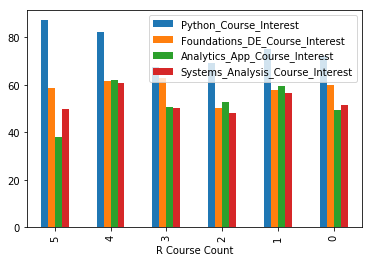

In [99]:
data[['Python_Course_Interest','Foundations_DE_Course_Interest','Analytics_App_Course_Interest','Systems_Analysis_Course_Interest',"R Course Count"]].groupby(["R Course Count"]).mean().sort_values(by='R Course Count', ascending=False).plot.bar()

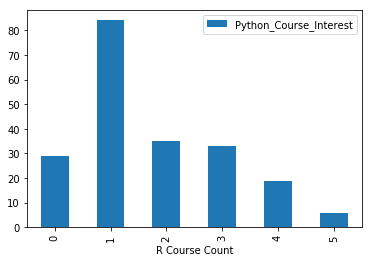

In [100]:
data[['Python_Course_Interest',"R Course Count"]].groupby(["R Course Count"]).count().plot.bar()

In [90]:
# Going to take a look at the count of types of classes (python,sas, r) versus desired languages to learn
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS","Python Course Count"]].groupby(["Python Course Count"]).mean().sort_values(by='Python Course Count', ascending=False)

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS
Python Course Count,,,,,
3,15.300000,6.200000,33.100000,33.700000,11.700000
2,10.794118,4.284314,32.637255,36.598039,15.686275
1,7.987500,5.550000,30.562500,38.312500,17.587500
0,13.666667,3.333333,25.000000,36.666667,21.333333


In [91]:
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS","SAS Course Count"]].groupby(["SAS Course Count"]).mean().sort_values(by='SAS Course Count', ascending=False)

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS
SAS Course Count,,,,,
2,10.508929,3.705357,30.500000,39.062500,16.223214
1,10.441176,6.176471,30.000000,33.970588,19.411765
0,9.278689,6.032787,33.508197,35.327869,15.852459


In [92]:
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS","R Course Count"]].groupby(["R Course Count"]).mean().sort_values(by='R Course Count', ascending=False)

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS
R Course Count,,,,,
5,25.000000,5.000000,20.000000,25.000000,25.000000
4,13.000000,2.750000,33.000000,36.750000,14.500000
3,9.000000,5.342857,29.714286,39.514286,16.428571
2,11.800000,3.942857,29.571429,40.885714,13.800000
1,10.252874,5.517241,31.482759,35.344828,17.402299
0,6.655172,4.413793,34.000000,35.724138,19.206897


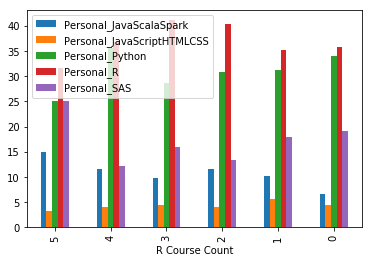

In [108]:
data[["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS","R Course Count"]].groupby(["R Course Count"]).mean().sort_values(by='R Course Count', ascending=False).plot.bar()

In [107]:
data[["Personal_JavaScalaSpark","R Course Count"]].groupby(["R Course Count"]).count()

,Personal_JavaScalaSpark
R Course Count,
0,29
1,84
2,36
3,33
4,19
5,6


# Conclusion

I would proceed with implementing the Python for Data Analysis course as well as Foundations of Data Engineering. There is enough interest to warrant the Analytics Application Development course while Data Science Systems Analysis was the least attractive option by a few points at anyway you cut the data. Additional courses should contain but not be limited to Python, SAS, or R.

Please consult the PDF write up for further details.